# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 631


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # print(requests.get(city_url).json())

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lon": city_lon, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(e)
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | mana
Processing Record 6 of Set 1 | cururupu
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | kamenka
Processing Record 9 of Set 1 | kaitangata
Processing Record 10 of Set 1 | joshimath
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | ganzhou
Processing Record 13 of Set 1 | panuco
Processing Record 14 of Set 1 | mount isa
Processing Record 15 of Set 1 | cockburn town
Processing Record 16 of Set 1 | panaba
Processing Record 17 of Set 1 | kamaishi
Processing Record 18 of Set 1 | henties bay
Processing Record 19 of Set 1 | rocha
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | yankton
Processing Record 22 of Set 1 | taolanaro
'coord'
City not found. Skipping...
Processing Rec

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lon           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,79.41,72,93,4.79,PF,1680219593
1,punta arenas,-53.1500,-70.9167,42.91,61,20,14.97,CL,1680219070
2,ushuaia,-54.8000,-68.3000,38.86,70,0,5.75,AR,1680219593
3,atuona,-9.8000,-139.0333,80.73,73,4,14.43,PF,1680219593
4,mana,5.6592,-53.7767,77.13,86,63,8.90,GF,1680219365


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/lucasludwig/Desktop/Python-API-Challenge/output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("/Users/lucasludwig/Desktop/Python-API-Challenge/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,79.41,72,93,4.79,PF,1680219593
1,punta arenas,-53.1500,-70.9167,42.91,61,20,14.97,CL,1680219070
2,ushuaia,-54.8000,-68.3000,38.86,70,0,5.75,AR,1680219593
3,atuona,-9.8000,-139.0333,80.73,73,4,14.43,PF,1680219593
4,mana,5.6592,-53.7767,77.13,86,63,8.90,GF,1680219365


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

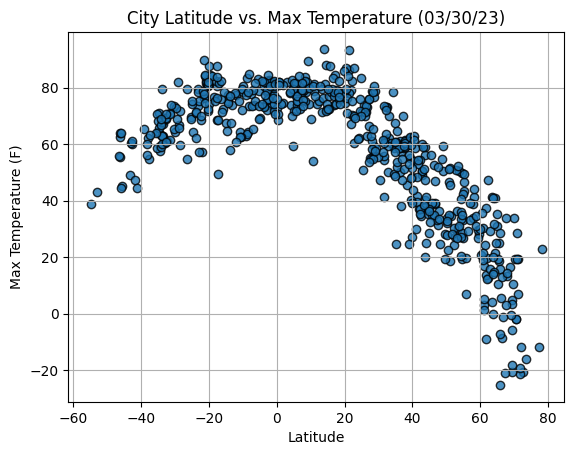

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("/Users/lucasludwig/Desktop/Python-API-Challenge/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

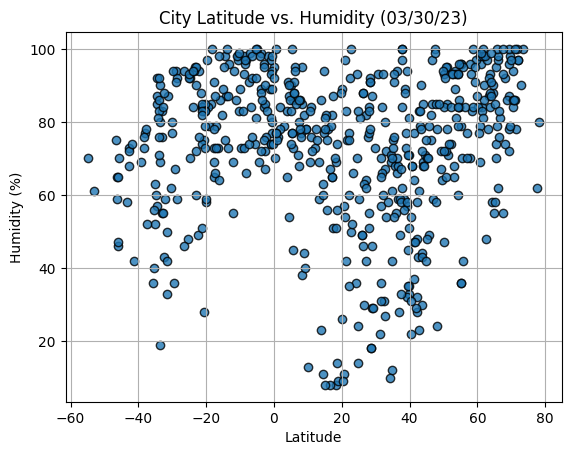

In [22]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("/Users/lucasludwig/Desktop/Python-API-Challenge/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

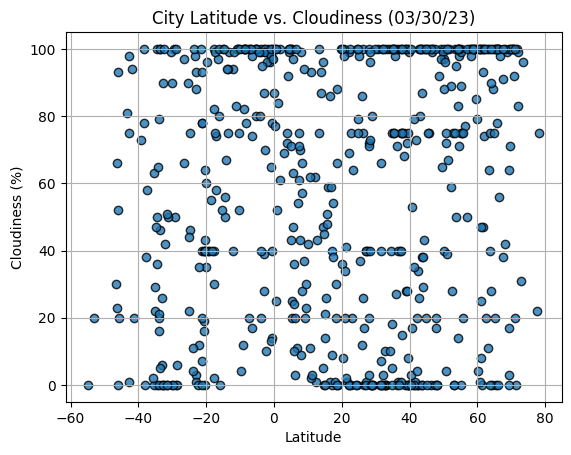

In [23]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("/Users/lucasludwig/Desktop/Python-API-Challenge/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

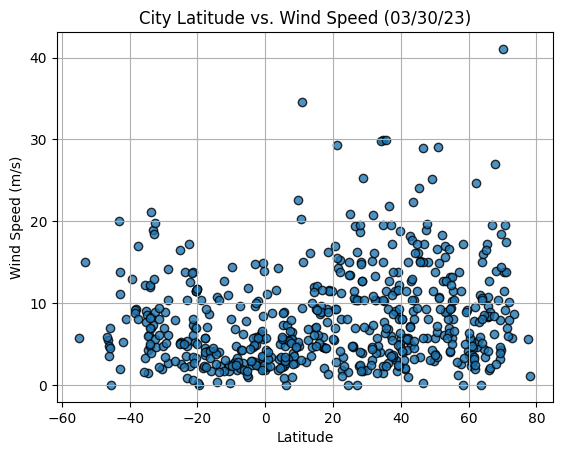

In [24]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("/Users/lucasludwig/Desktop/Python-API-Challenge/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,mana,5.6592,-53.7767,77.13,86,63,8.90,GF,1680219365
6,albany,42.6001,-73.9662,34.59,43,34,7.16,US,1680219457
7,kamenka,51.3223,42.7678,34.57,71,67,14.94,RU,1680219366
9,joshimath,30.5667,79.5667,47.23,93,100,6.76,IN,1680219891
11,ganzhou,28.8184,115.4327,59.29,87,80,1.66,CN,1680219376


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,79.41,72,93,4.79,PF,1680219593
1,punta arenas,-53.1500,-70.9167,42.91,61,20,14.97,CL,1680219070
2,ushuaia,-54.8000,-68.3000,38.86,70,0,5.75,AR,1680219593
3,atuona,-9.8000,-139.0333,80.73,73,4,14.43,PF,1680219593
5,cururupu,-1.8283,-44.8683,73.99,98,100,2.28,BR,1680219366


###  Temperature vs. Latitude Linear Regression Plot

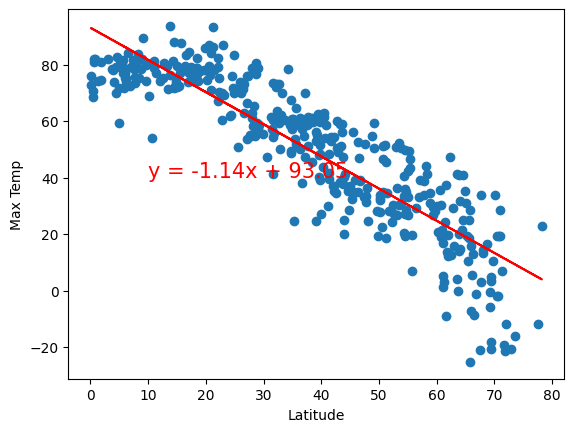

In [31]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))


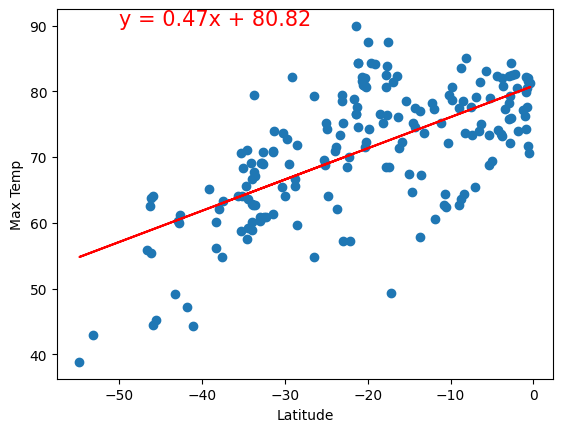

In [32]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))


**Discussion about the linear relationship:** There is distinct correlation between lines of latitude and max temperature.  As the lines of latitude approach 0 degrees (equator) the max temperature increases.

### Humidity vs. Latitude Linear Regression Plot

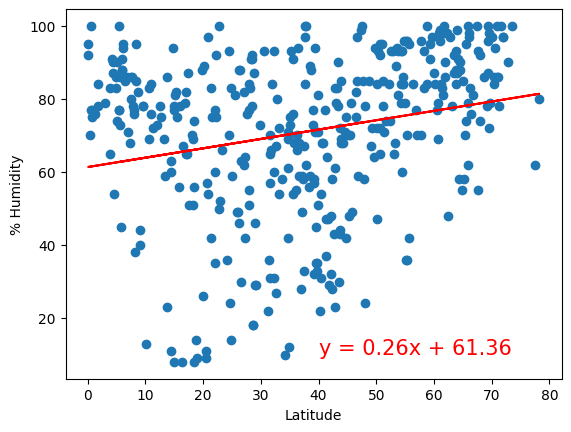

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

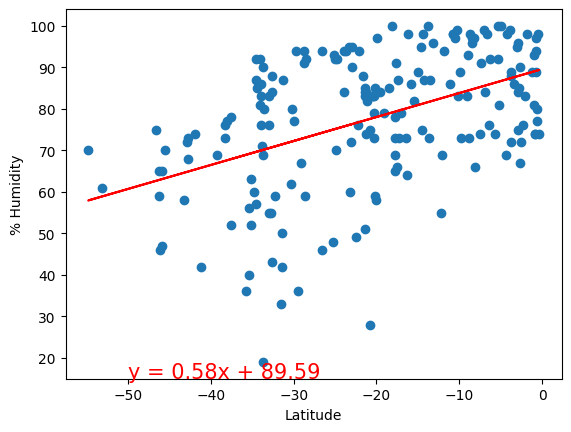

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

**Discussion about the linear relationship:** There is a correlation between lines of latitude and humidity, however the correlation seems to be stronger in the southern hemisphere.  The northern hemisphere seems to have a wider range of humidity values.

### Cloudiness vs. Latitude Linear Regression Plot

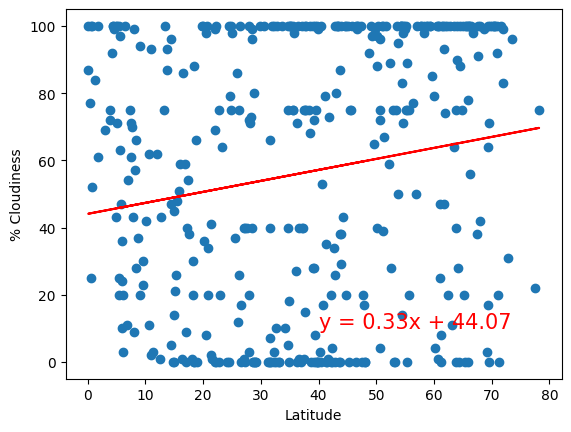

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

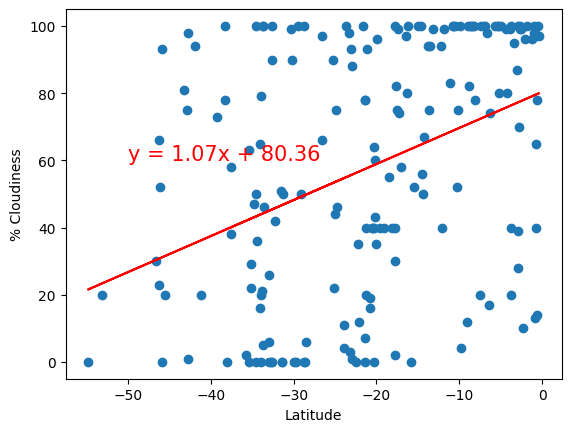

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

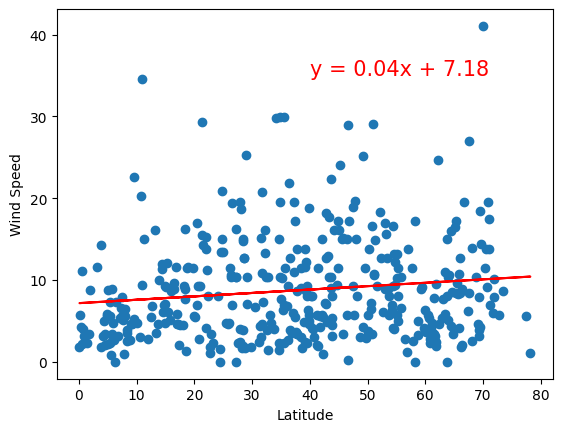

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

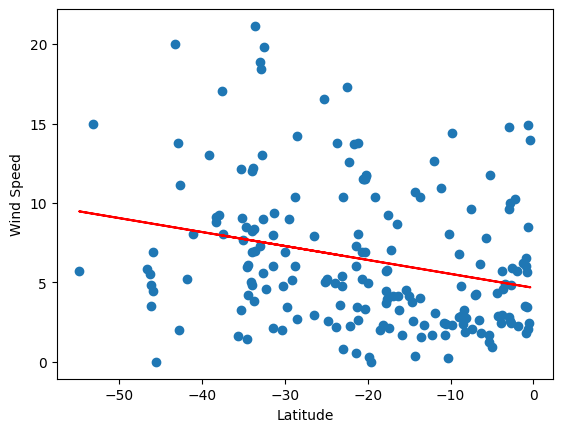

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))

**Discussion about the linear relationship:** YOUR RESPONSE HERE